In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import pearsonr



In [3]:
%store -r all_ws_clustered

In [5]:
all_ws_clustered

,0,1,2,3,4,5,6,7,8,9,...,1593,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,1.533611
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,1.574685
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,1.724822
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,1.568101
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,2.120277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6,2.840376
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.019681,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6,2.060717
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6,2.658009
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6,1.833412


In [6]:
all_ws_clustered.iloc[:, : -3]

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.061334,0.054821,0.094158,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.089011,0.139586,0.090089,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.119727,0.099837,0.117549,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.056177,0.036667,0.069045,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.113334,0.057722,0.054529,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.143480,0.146509,0.106031,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.019539,0.023911,0.022255,0.019681,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.073534,0.079672,0.034247,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.094275,0.135084,0.181331,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384


In [7]:
df = all_ws_clustered.iloc[:, : -3]

In [8]:
scaler = StandardScaler()

In [9]:
df_scaled = scaler.fit_transform(df)

In [10]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_scaled)

In [11]:
principal_components.shape

(184, 2)

In [12]:
principal_components

array([[ 3.61974693e+00, -2.05803017e+01],
       [ 2.56833833e+00, -2.11961387e+01],
       [ 1.76143136e+00, -1.70443408e+01],
       [ 3.54543420e+00, -2.03445827e+01],
       [-2.04281698e+00, -1.65001318e+01],
       [ 1.28265487e+00, -1.71807565e+01],
       [ 2.74440770e+00, -1.80799307e+01],
       [ 5.63952787e+00,  9.28907097e+00],
       [-5.23677246e+00,  1.44114794e+00],
       [-5.77253211e+00, -1.35039717e+01],
       [ 3.01415424e+00, -1.06992465e+00],
       [-3.67690672e+00,  2.05965329e+01],
       [ 1.80300556e+00,  2.86375982e+00],
       [-1.18152236e+00,  1.43106642e+01],
       [-8.45298503e+00,  9.27857183e+00],
       [-2.28891413e+01,  2.09317398e+01],
       [-1.32469028e+01, -1.25687780e+00],
       [-1.92124057e+01,  1.89941676e+01],
       [-2.33740516e+01,  2.34465907e+01],
       [-1.93917456e+01,  2.27929148e+01],
       [-1.65984495e+01,  6.79656253e+00],
       [ 2.72923680e+01,  2.45101159e+00],
       [ 2.50222032e+01, -6.53509426e-01],
       [ 2.

In [13]:
principal_components_df = pd.DataFrame(principal_components)

In [14]:
from scipy.spatial import distance_matrix

In [15]:
pc_distances = distance_matrix(principal_components_df, principal_components_df)

In [16]:
# Normalize distances to range [0, 2]
min_val = np.min(pc_distances)
max_val = np.max(pc_distances)

normalized_distances = 2 * (pc_distances - min_val) / (max_val - min_val)

In [17]:
normalized_distances_df = pd.DataFrame(normalized_distances)

In [18]:
normalized_distances_df

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.000000,0.025875,0.084827,0.005249,0.148213,0.087606,0.056257,0.635746,0.504044,0.249724,...,0.831120,0.847484,0.692672,0.806392,0.685911,0.725399,0.428901,0.565003,0.187650,0.294571
1,0.025875,0.000000,0.089816,0.027524,0.139761,0.089534,0.066280,0.650652,0.508491,0.240948,...,0.855551,0.870415,0.714901,0.829160,0.706278,0.746968,0.450962,0.582355,0.195933,0.295507
2,0.084827,0.089816,0.000000,0.079667,0.081608,0.010572,0.030321,0.565240,0.419741,0.176773,...,0.802974,0.807558,0.649101,0.765580,0.633048,0.678087,0.386500,0.501418,0.106334,0.209916
3,0.005249,0.027524,0.079667,0.000000,0.144041,0.082601,0.051011,0.630861,0.498811,0.245471,...,0.828320,0.844060,0.689024,0.802913,0.681805,0.721572,0.425189,0.560387,0.182406,0.289466
4,0.148213,0.139761,0.081608,0.144041,0.000000,0.072083,0.107053,0.571434,0.386986,0.101594,...,0.855203,0.849745,0.689261,0.807263,0.663509,0.714136,0.432509,0.520049,0.117677,0.169167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.725399,0.746968,0.678087,0.721572,0.714136,0.685882,0.686656,0.270691,0.534614,0.718788,...,0.223480,0.147788,0.047306,0.107464,0.069509,0.000000,0.296958,0.229720,0.596466,0.613309
180,0.428901,0.450962,0.386500,0.425189,0.432509,0.395048,0.392334,0.295880,0.393991,0.458299,...,0.423902,0.421126,0.263966,0.379291,0.263928,0.296958,0.000000,0.195900,0.317420,0.370124
181,0.565003,0.582355,0.501418,0.560387,0.520049,0.507214,0.517094,0.101180,0.306548,0.506924,...,0.437243,0.377484,0.229366,0.336905,0.163267,0.229720,0.195900,0.000000,0.405159,0.396281
182,0.187650,0.195933,0.106334,0.182406,0.117677,0.108726,0.131579,0.462761,0.318317,0.152742,...,0.741177,0.732564,0.571904,0.690032,0.546083,0.596466,0.317420,0.405159,0.000000,0.124113


In [19]:
pc_distances_df = pd.DataFrame(pc_distances)

In [20]:
principal_components_distances.shape

NameError: name 'principal_components_distances' is not defined

In [21]:
principal_components_distances

NameError: name 'principal_components_distances' is not defined

# calculate original distances

In [ ]:
# calculate a pearson correlation based metric as a distance measure 

In [22]:
corr_matrix = df.T.corr()
og_distances = 1 - corr_matrix

In [23]:
og_distances.shape

(184, 184)

In [24]:
normalized_distances_df

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.000000,0.025875,0.084827,0.005249,0.148213,0.087606,0.056257,0.635746,0.504044,0.249724,...,0.831120,0.847484,0.692672,0.806392,0.685911,0.725399,0.428901,0.565003,0.187650,0.294571
1,0.025875,0.000000,0.089816,0.027524,0.139761,0.089534,0.066280,0.650652,0.508491,0.240948,...,0.855551,0.870415,0.714901,0.829160,0.706278,0.746968,0.450962,0.582355,0.195933,0.295507
2,0.084827,0.089816,0.000000,0.079667,0.081608,0.010572,0.030321,0.565240,0.419741,0.176773,...,0.802974,0.807558,0.649101,0.765580,0.633048,0.678087,0.386500,0.501418,0.106334,0.209916
3,0.005249,0.027524,0.079667,0.000000,0.144041,0.082601,0.051011,0.630861,0.498811,0.245471,...,0.828320,0.844060,0.689024,0.802913,0.681805,0.721572,0.425189,0.560387,0.182406,0.289466
4,0.148213,0.139761,0.081608,0.144041,0.000000,0.072083,0.107053,0.571434,0.386986,0.101594,...,0.855203,0.849745,0.689261,0.807263,0.663509,0.714136,0.432509,0.520049,0.117677,0.169167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.725399,0.746968,0.678087,0.721572,0.714136,0.685882,0.686656,0.270691,0.534614,0.718788,...,0.223480,0.147788,0.047306,0.107464,0.069509,0.000000,0.296958,0.229720,0.596466,0.613309
180,0.428901,0.450962,0.386500,0.425189,0.432509,0.395048,0.392334,0.295880,0.393991,0.458299,...,0.423902,0.421126,0.263966,0.379291,0.263928,0.296958,0.000000,0.195900,0.317420,0.370124
181,0.565003,0.582355,0.501418,0.560387,0.520049,0.507214,0.517094,0.101180,0.306548,0.506924,...,0.437243,0.377484,0.229366,0.336905,0.163267,0.229720,0.195900,0.000000,0.405159,0.396281
182,0.187650,0.195933,0.106334,0.182406,0.117677,0.108726,0.131579,0.462761,0.318317,0.152742,...,0.741177,0.732564,0.571904,0.690032,0.546083,0.596466,0.317420,0.405159,0.000000,0.124113


In [25]:
og_distances

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.000000,0.128832,0.176357,0.018425,0.315207,0.402387,0.160078,0.722384,1.420081,1.235495,...,1.140673,1.151450,1.256782,1.169251,1.110331,1.181662,1.046679,0.968105,1.156943,1.076838
1,0.128832,0.000000,0.162370,0.150666,0.266348,0.361961,0.152920,0.684806,1.432764,1.262466,...,1.159759,1.187128,1.253385,1.196012,1.117805,1.197628,1.087562,1.018967,1.156080,1.049587
2,0.176357,0.162370,0.000000,0.199551,0.319337,0.187328,0.168080,0.976001,1.417002,1.210814,...,1.210199,1.181274,1.230108,1.232348,1.180969,1.186724,1.108610,1.040743,1.124477,1.074277
3,0.018425,0.150666,0.199551,0.000000,0.311101,0.420979,0.178454,0.725820,1.401204,1.231455,...,1.134445,1.141001,1.253615,1.167377,1.102606,1.173230,1.043181,0.957348,1.148462,1.063764
4,0.315207,0.266348,0.319337,0.311101,0.000000,0.415585,0.304179,0.722593,1.259730,1.091095,...,1.238535,1.210547,1.272749,1.243041,1.173869,1.209749,1.121962,1.067618,1.131920,1.060549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1.181662,1.197628,1.186724,1.173230,1.209749,1.122037,1.197372,0.918001,1.083313,1.014943,...,0.171103,0.164591,0.102955,0.156102,0.153760,0.000000,0.636563,0.777282,0.921596,1.136161
180,1.046679,1.087562,1.108610,1.043181,1.121962,1.137485,1.053994,0.879351,1.138228,1.158666,...,0.517838,0.830153,0.623963,0.543952,0.493672,0.636563,0.000000,0.132062,1.301227,1.387375
181,0.968105,1.018967,1.040743,0.957348,1.067618,1.086776,1.005977,0.956404,1.116474,1.137356,...,0.689619,0.958839,0.771060,0.726401,0.663195,0.777282,0.132062,0.000000,1.316226,1.323919
182,1.156943,1.156080,1.124477,1.148462,1.131920,1.053158,1.166743,1.105825,0.733350,0.876350,...,0.858444,0.671498,1.004701,0.815762,0.923146,0.921596,1.301227,1.316226,0.000000,0.158393


In [97]:
from sklearn.metrics import r2_score

In [27]:
og_min = np.min(og_distances)
og_max = np.max(og_distances)

og_distances_scaled = 2 * (og_distances - og_min) / (og_max - og_min)
y_test = og_distances_scaled.values[np.triu_indices(184, k=1)]
y_pred = normalized_distances_df.values[np.triu_indices(184, k=1)]



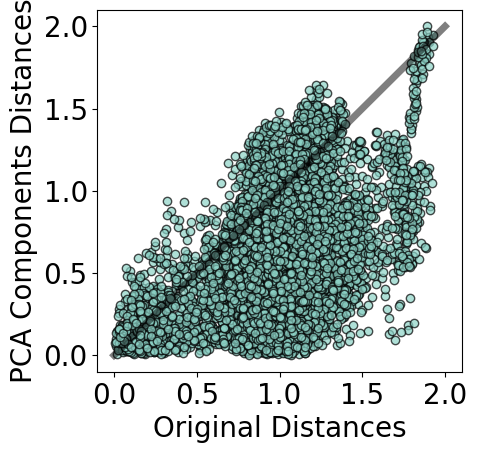

In [167]:
# Scatter plot
plt.figure(figsize=(4.7, 4.7))

plt.scatter(
    og_distances.values[np.triu_indices(184, k=1)], 
    normalized_distances_df.values[np.triu_indices(184, k=1)], 
    c='#8dd3c7', edgecolor='black', alpha=0.7
)

# Plot y = x line
plt.plot(np.arange(3), np.arange(3), c='black', linewidth=5, alpha=0.5)

# Compute R^2
r2 = r2_score(
    og_distances.values[np.triu_indices(184, k=1)], 
    normalized_distances_df.values[np.triu_indices(184, k=1)]
)

# Labels and formatting
plt.xlabel('Original Distances', fontsize=20)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0])
plt.ylabel('PCA Components Distances', fontsize=20)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0])
plt.tick_params(axis='both', which='major', labelsize=20)


# Add R^2 text
# plt.text(0.1, 2.5, rf'$R^2 = {r2:.2f}$', fontsize=20, verticalalignment='top')
plt.savefig('/Users/iuliarusu/Documents/Sharpee/final_images/figure2/PCA_sheppard_diagram.png', format='png', bbox_inches='tight')
plt.show()



In [31]:
total_var = np.var(og_distances.values[np.triu_indices(24, k=1)] + normalized_distances_df.values[np.triu_indices(24, k=1)])
total_var

0.452831749547369

In [33]:
og_var = np.var(og_distances.values[np.triu_indices(24, k=1)])
og_var


0.18927356499174752

In [35]:
normalized_dist_var = np.var(normalized_distances_df.values[np.triu_indices(24, k=1)])

In [37]:
r2= 1 - (normalized_dist_var / og_var)
r2

0.5521399883800333

In [36]:
1 - (normalized_dist_var / total_var)

0.8128045105024393

In [38]:
def r_squared(x, y):
    # Fit a linear model: Y = aX + b
    a, b = np.polyfit(x, y, 1)  # Linear regression (degree = 1)
    
    # Predicted Y values
    y_pred = a * x + b  

    # Compute variance
    total_variance = np.var(y, ddof=1)  # Variance of Y
    unexplained_variance = np.var(y - y_pred, ddof=1)  # Variance of residuals

    # Compute R²
    r2 = 1 - (unexplained_variance / total_variance)
    return r2

In [39]:
r = r_squared(og_distances.values[np.triu_indices(24, k=1)], normalized_distances_df.values[np.triu_indices(24, k=1)])
r

0.4980865863497649

In [153]:
fig, ax = plt.subplots(figsize=(3.7 * 3.7))

ax.scatter(og_distances.values[np.triu_indices(24, k=1)], normalized_distances_df.values[np.triu_indices(24, k=1)], c='#8dd3c7', edgecolor='black', alpha=0.7) #cornflowerblue, lightcoral
ax.plot(np.arange(3), np.arange(3), c='black', linewidth=5, alpha=0.5)
r2 = r2_score(og_distances.values[np.triu_indices(24, k=1)], normalized_distances_df.values[np.triu_indices(24, k=1)])
ax.set_xlabel('Original Distances', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('Embedding Distances / $\lambda$', fontsize=20)
# ax[0].text(0.1, 2.5, f'R**2 = {r2:.2f}', fontsize=20)
ax.text(0.1, 2.5, f'$R^2 = {r2:.2f}$', fontsize=20, verticalalignment='top')

TypeError: Value after * must be an iterable, not float

In [42]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

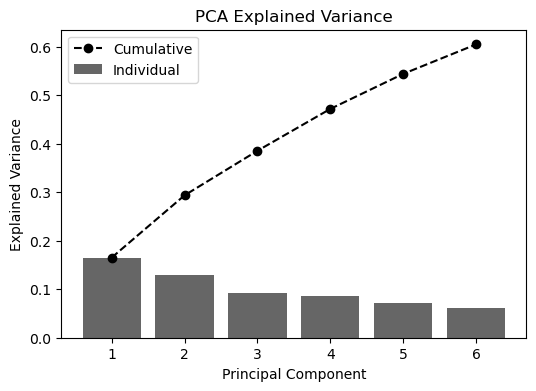

In [50]:
# Plot variance explained for top 3 components
plt.figure(figsize=(6, 4))
plt.bar(range(1, 7), explained_variance_ratio, alpha=0.6, color = 'black', label='Individual')
plt.plot(range(1, 7), cumulative_variance, marker='o', color = 'black', linestyle='--', label='Cumulative')
plt.xticks([1, 2, 3, 4, 5, 6])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.savefig('/Users/iuliarusu/Documents/Sharpee/final_images/figure2/PCA_variance.svg', format='svg', bbox_inches='tight')
plt.show()


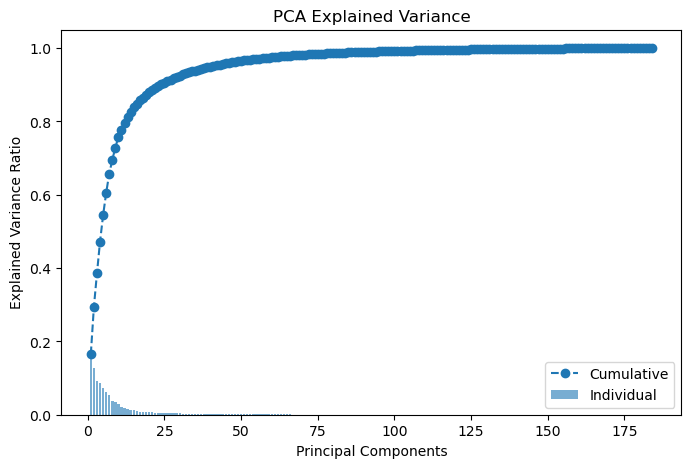

In [36]:
# Plot variance explained
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.6, label='Individual')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', label='Cumulative')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()

In [7]:
df_stand = StandardScaler().fit_transform(df)

In [23]:
pca = PCA(n_components=10)  # You can set n_components to 'mle' or a float < 1 to choose automatically based on explained variance
principalComponents = pca.fit_transform(df_stand)

In [25]:
principalComponents

array([[  3.61974695, -20.58030061,  -8.70402967, ...,   4.7542563 ,
         -6.7340001 ,  -0.10680729],
       [  2.56833831, -21.19613817,  -7.07221095, ...,   4.42515023,
         -7.61733052,  -0.40412602],
       [  1.76143137, -17.04434041,  -6.32255   , ...,   1.28170606,
         -4.24484703,  -2.05597056],
       ...,
       [  8.59988246,   5.55574245,   5.85223737, ...,   5.95988092,
         -7.67900252,  -2.40242981],
       [  1.27389536, -12.06081466,   3.06212453, ..., -10.20018522,
          8.29284775,  -5.01992334],
       [ -3.48308871,  -8.66526267,  -2.51783217, ...,  -5.43605936,
          3.80174397,  -4.58735801]])

In [24]:
principal_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

ValueError: Shape of passed values is (184, 10), indices imply (184, 2)

In [10]:
print(pca.explained_variance_ratio_)

[0.16509987 0.12833621]


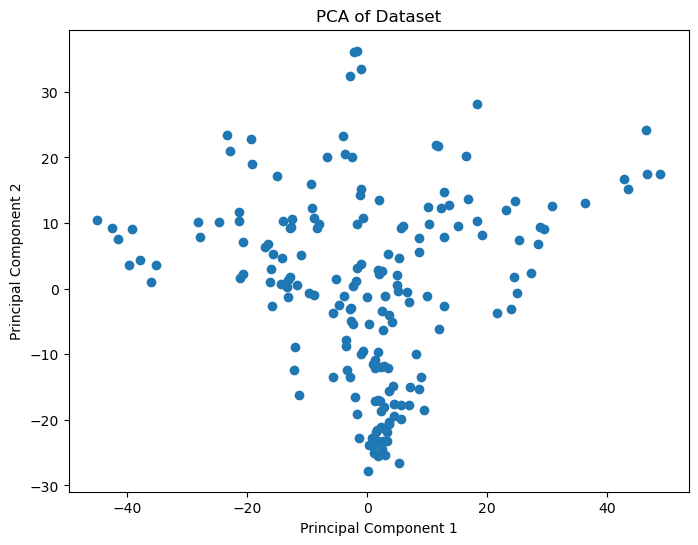

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

In [13]:
explained_variance = pca.explained_variance_ratio_

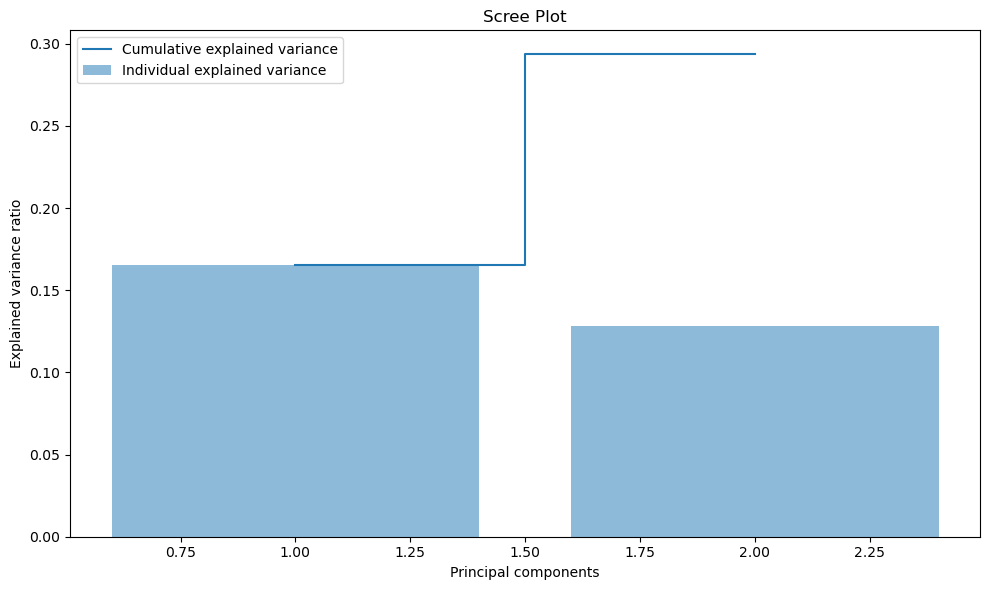

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
explained_variance.cumsum()

array([0.16509987, 0.29343608])

In [15]:
principal_df['Group'] = all_ws_clustered['cell_type']

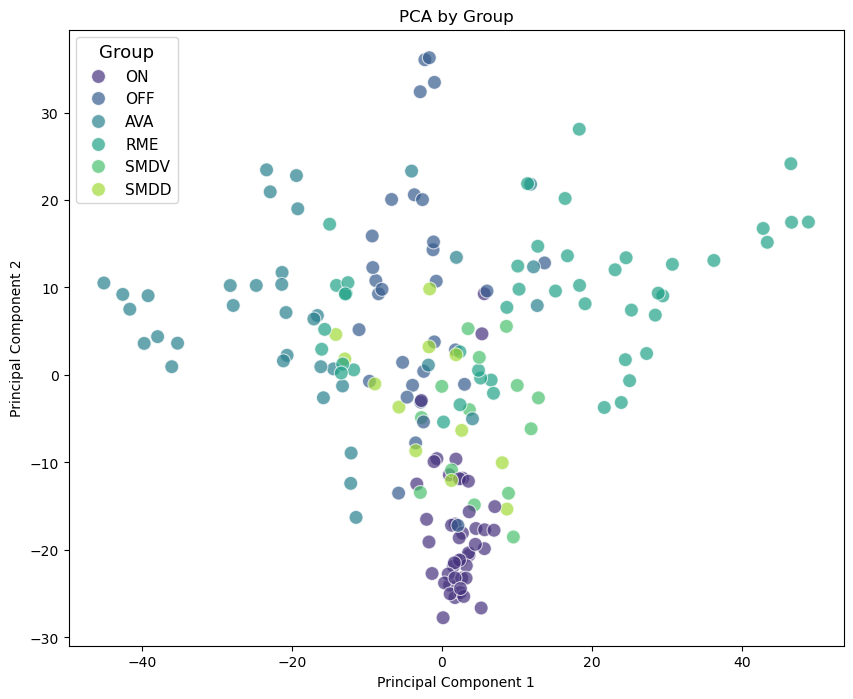

In [17]:


# Creating a scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Group', data=principal_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA by Group')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Group', title_fontsize='13', fontsize='11', loc='best')
plt.show()

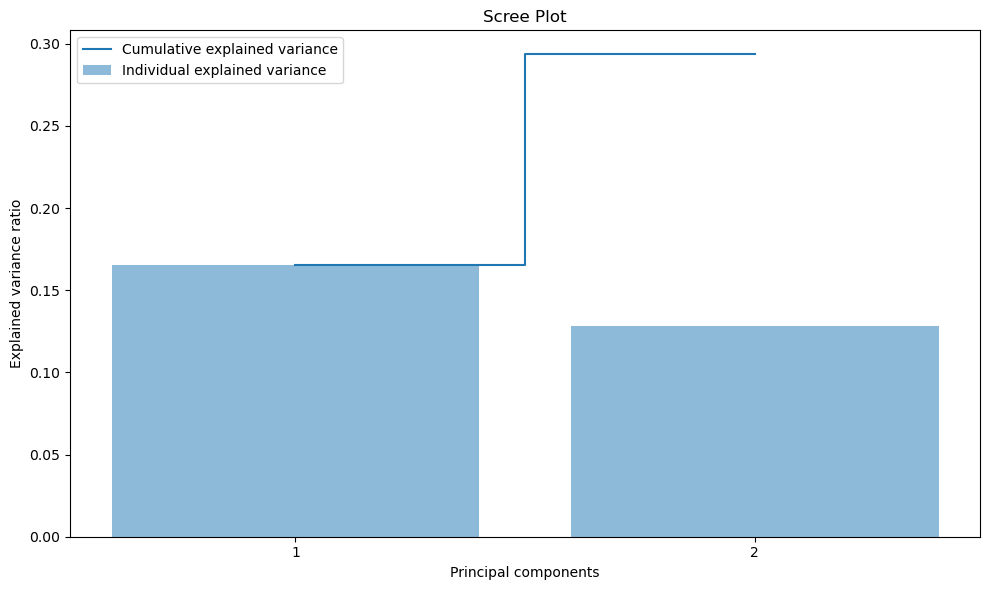

In [18]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.xticks(range(1, len(explained_variance) + 1))  # Adding tick marks for each component
plt.tight_layout()
plt.show()

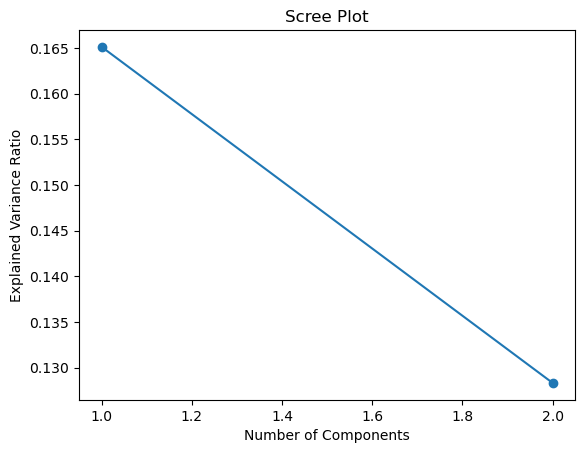

In [21]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

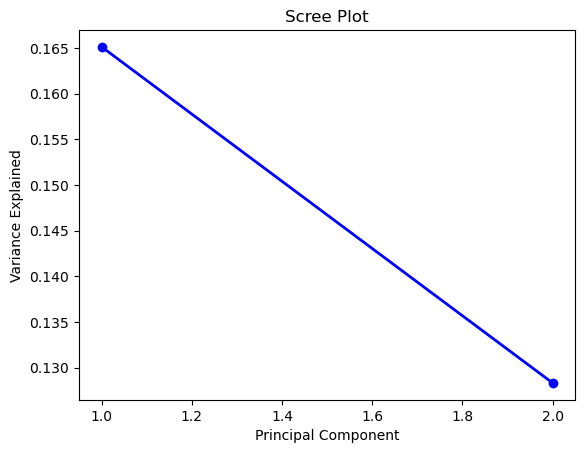

In [22]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()